In [1]:
path = '/home/luc/Documents/Data_Science_Retreat/_portfolio-project/sleep-apnea/data/retired/995_1_2.wav'

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision import transforms
import matplotlib.cm as cm
import torch

In [3]:
audio, sr = librosa.load(path)

In [4]:
snippet1 = audio[0:30*16000]
snippet2 = audio[30*16000:60*16000]

In [5]:
mel = librosa.feature.melspectrogram(y=snippet2, sr=sr)
mel_db = librosa.power_to_db(mel, ref=np.max)
mel_db.shape

(128, 938)

In [6]:
mel_db

array([[-12.859366 ,  -9.326371 ,  -9.846097 , ...,  -4.6973295,
         -5.670244 ,  -9.540193 ],
       [-17.051107 , -15.480768 , -12.99353  , ..., -20.318596 ,
        -18.758314 , -19.670795 ],
       [-18.705757 , -18.512333 , -19.294527 , ..., -20.021135 ,
        -21.423359 , -22.590616 ],
       ...,
       [-65.803185 , -71.83721  , -80.       , ..., -80.       ,
        -80.       , -68.90728  ],
       [-65.835144 , -71.86916  , -80.       , ..., -80.       ,
        -80.       , -68.94121  ],
       [-65.857254 , -71.89128  , -80.       , ..., -80.       ,
        -80.       , -68.964516 ]], dtype=float32)

In [209]:
def map_value(x, in_min=-80.0, in_max=0.0, out_min=0, out_max=255):
    return (x - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

mel_db = map_value(mel_db, mel_db.min(), mel_db.max())
mel_db

array([[214.01077 , 225.27219 , 223.61555 , ..., 240.02727 , 236.9261  ,
        224.59065 ],
       [200.64958 , 205.65506 , 213.58313 , ..., 190.23447 , 195.20787 ,
        192.29935 ],
       [195.3754  , 195.99194 , 193.4987  , ..., 191.18265 , 186.71304 ,
        182.99242 ],
       ...,
       [ 45.25235 ,  26.018887,   0.      , ...,   0.      ,   0.      ,
         35.358044],
       [ 45.15048 ,  25.917042,   0.      , ...,   0.      ,   0.      ,
         35.2499  ],
       [ 45.08    ,  25.846542,   0.      , ...,   0.      ,   0.      ,
         35.175606]], dtype=float32)

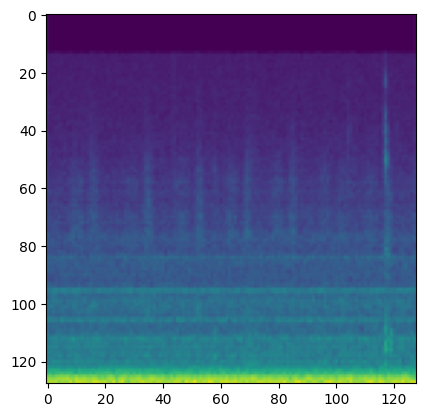

In [228]:
ima = Image.fromarray(mel_db)
ima = ima.convert('RGB')
ima = ima.rotate(180)
ima = ima.transpose(Image.FLIP_LEFT_RIGHT)
ima = ima.resize((128, 128))
ima_cmap = cm.viridis(np.array(ima)[:,:,0])
plt.imshow(ima_cmap)

In [132]:
mel_db.shape

(128, 938)

In [187]:
image = Image.open('mel_test.png')


In [202]:
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
])

In [190]:
tensor = transform(image)

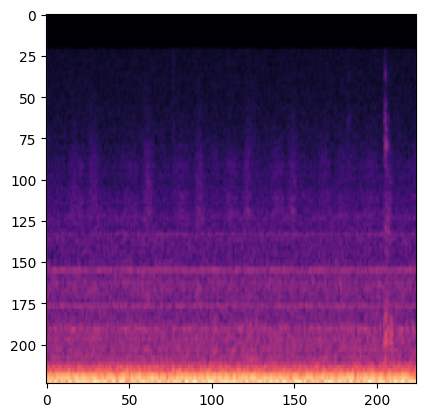

In [191]:
plt.imshow(tensor.permute(1,2,0))

In [15]:
spec = librosa.feature.melspectrogram(y=snippet2, sr=sr)

In [16]:
spec.min(), spec.max()

(2.7366697e-17, 54.83397)